# Classification using Artificial Neural Networks

Predicting multiple values (Green + Energy + Radiation) but just from the 5 initial GH inputs:

-Pot Min width

-Mind Depth

-Max Depth

-Min Height

-Max Height

#Numerical regression

in this example we will use Keras to predict wages based on various professional and demographic factors.

In [ ]:
# Import standard Libraries
import pandas as pd
import seaborn as sns
import altair as alt
import tensorflow as tf
import matplotlib.pyplot as plt



sns.set(rc={'figure.figsize':(10,10)})
print("imports ok")

imports ok


##Load Data

In [ ]:
#connect google drive to this colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Load data file
#data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/DATASET_wages.csv')
#data = pd.read_csv('/content/gdrive/MyDrive/3.S.1 - Data Encoding    SUBMISSIONS/Case Study/SYNC/s_G4/AIA-COM_VISION-URBAN_BLOCK-FULL_SAMPLE.csv')
data = pd.read_csv('/content/gdrive/MyDrive/DATASETS/AIA-COM_VISION-URBAN_BLOCK-FULL_SAMPLE.csv')
pd.options.display.max_columns = None

data.shape

(3150, 16)

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Plot_Min_Witdh        3150 non-null   float64
 1   Plot_Count            3150 non-null   int64  
 2   Build_Min_Depth       3150 non-null   float64
 3   Build_Max_Depth       3150 non-null   float64
 4   Build_Min_Heigth      3150 non-null   float64
 5   Build_Max_Heigth      3150 non-null   float64
 6   Building_Volume       3150 non-null   float64
 7   Building_Area         3150 non-null   float64
 8   Green_Area            3150 non-null   float64
 9   Average_FAR           3150 non-null   float64
 10  Average_Build_Heigth  3150 non-null   float64
 11  Gross_area            3150 non-null   float64
 12  Radiation_Min         3150 non-null   float64
 13  Radiation_Total       3150 non-null   float64
 14  Green_Comfort         3150 non-null   float64
 15  Energy_Balance       

In [ ]:
#data.drop(columns=[ "Plot_Min_Witdh", 'Plot_Count', 'Average_Build_Heigth', 'Gross_area', 'Radiation_Min'], inplace=True)
#print(data.info())

In [ ]:
data.head(5)

,Plot_Min_Witdh,Plot_Count,Build_Min_Depth,Build_Max_Depth,Build_Min_Heigth,Build_Max_Heigth,Building_Volume,Building_Area,Green_Area,Average_FAR,Average_Build_Heigth,Gross_area,Radiation_Min,Radiation_Total,Green_Comfort,Energy_Balance
0,23.567287,12,18.896986,87.101372,33.423961,69.709425,905684.79,19016.096966,2294.836551,45.302281,49.287614,905684.79,6.75,9020.00,0.1443,-3999265.33
1,23.594317,12,18.920587,87.074576,33.465302,70.018368,861633.61,18218.498350,3092.435166,41.293683,49.445949,861633.61,3.75,8766.75,0.2020,-3738010.46
2,23.617754,12,18.936806,87.029570,33.503203,70.318018,849853.68,17747.623240,3563.310276,42.801458,49.598283,849853.68,6.75,8293.25,0.2353,-3803102.11
3,23.639693,12,18.952886,86.941352,33.520445,70.610060,974329.64,20143.462752,1167.470764,48.357521,49.735665,974329.64,6.75,9489.25,0.0701,-4464418.91
4,23.658520,12,18.963791,86.850475,33.538814,70.873055,762944.57,15490.497768,5820.435749,40.797919,49.860983,762944.57,6.75,6987.00,0.2157,-3642095.96


##Prepare Data

In [ ]:
# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()

#declare features
#X = data[["Plot_Min_Witdh", "Build_Max_Depth", "Building_Area"]]
#X = data[["Plot_Min_Witdh", "Build_Max_Depth", "Building_Volume", "Building_Area"]]
X = data[['Build_Min_Depth', "Build_Max_Depth", 'Build_Min_Heigth', 'Build_Max_Heigth', "Building_Volume", "Building_Area", 'Green_Area', 'Average_FAR', "Plot_Min_Witdh"]]


# Apply the scaler to our X-features
X_scaled = scalerX.fit_transform(X)

print(X_scaled.shape)
print(X_scaled[0])

(3150, 9)
[ 1.58656104  1.57439087  1.69183861  1.47684253  1.76488417  0.67673085
 -0.67673085  1.98552519  0.57585692]


In [ ]:
#declare regression target
from sklearn.preprocessing import MinMaxScaler
scalerY = StandardScaler()

y = data.loc[:, ["Radiation_Total", "Energy_Balance", "Green_Comfort"]].to_numpy()
#y = data.loc[:, ["Green_Comfort"]].to_numpy()
print("y shape after data loc ", y.shape)

#y = y.reshape(-1, 1)
#print("y shape after reshape ", y.shape)

y_scaled = scalerY.fit_transform(y)
#print("y shape after scale ", y_scaled.shape)

#reshape = y_scaled.reshape(3150, 2)
#print("y re shaped to orig struc ", reshape.shape)

y shape after data loc  (3150, 3)


**SPLIT INTO TRAIN AND TEST**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state = 21)

#Build model

From the cheatSheet
Regression between 0 and 1>> 
      activation = relu for hidden layers / sigmoid for final layer
      loss = mean squared error
      optimizer = adam
      input from data, is 8 columns
      output is 1 value prediction

In [ ]:
# Instantiate a sequential model
model = tf.keras.models.Sequential()
n_cols = X_scaled.shape[1]  

# Add 2 dense layers of 50 and 32 neurons each
model.add(tf.keras.layers.Dense(32, input_shape=(n_cols,), activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))

# Add a dense layer with 1 value output
model.add(tf.keras.layers.Dense(3, activation= "linear"))
  
# Compile your model 
model.compile(optimizer = "adam", loss = "mean_absolute_error")
print(n_cols)

9


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 3

#Train model

In [ ]:
# Fit your model to the training data for 200 epochs
#we assign this to history variable so we can plot the training data
history = model.fit(X_train,y_train,epochs=200, validation_split=0.2)

Epoch 1/200
63/63 [==============================] - 1s 5ms/step - loss: 0.4730 - val_loss: 0.4603
Epoch 2/200
63/63 [==============================] - 0s 2ms/step - loss: 0.4044 - val_loss: 0.4088
Epoch 3/200
63/63 [==============================] - 0s 2ms/step - loss: 0.3245 - val_loss: 0.3226
Epoch 4/200
63/63 [==============================] - 0s 3ms/step - loss: 0.2613 - val_loss: 0.2846
Epoch 5/200
63/63 [==============================] - 0s 2ms/step - loss: 0.2266 - val_loss: 0.2564
Epoch 6/200
63/63 [==============================] - 0s 2ms/step - loss: 0.1983 - val_loss: 0.2317
Epoch 7/200
63/63 [==============================] - 0s 2ms/step - loss: 0.1769 - val_loss: 0.2210
Epoch 8/200
63/63 [==============================] - 0s 2ms/step - loss: 0.1634 - val_loss: 0.2054
Epoch 9/200
63/63 [==============================] - 0s 2ms/step - loss: 0.1524 - val_loss: 0.1927
Epoch 10/200
63/63 [==============================] - 0s 2ms/step - loss: 0.1377 - val_loss: 0.1664
Epoch 11/

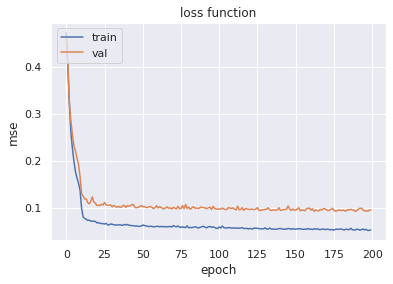

In [ ]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss function')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Evaluate model on test data



In [ ]:
# Evaluate your model accuracy on the test data
loss_test = model.evaluate(X_test,y_test)

# Print accuracy
print('mse_test:', loss_test)

20/20 [==============================] - 0s 1ms/step - loss: 0.0622
mse_test: 0.062217652797698975


we can see the model is again slightly overfitting, but what does this translate in terms of USD accuracy of our prediction?

#Plot error


In [ ]:
def plot_comparison(x_val, pred, truth, xlab, ylab):
  fig, ax1 = plt.subplots()
  ax1.plot(x_val, truth, color = "red", label = "truth",linestyle='None', marker = "o", markersize = 5)
  ax1.plot(x_val, pred, color = "blue", label = "pred",linestyle='None', marker = "o", markersize = 4, alpha = 0.5)

  ax1.set_xlabel(xlab)
  ax1.set_ylabel(ylab)
  ax1.legend()
  fig.set_figheight(7)
  fig.set_figwidth(10)
  plt.title('Prediction Comparison')
  plt.show()

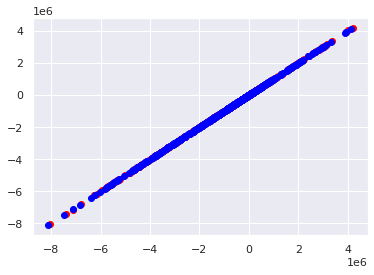

In [ ]:
y_pred = scalerY.inverse_transform(model.predict(X_test))
y_truth = scalerY.inverse_transform(y_test)
plt.scatter(y_truth,y_truth, c='red')
plt.scatter(y_pred,y_pred, c='blue')

In [ ]:
#RADIATION PREDICTIONS
y_pred_01 = y_pred[:,0]
print(y_pred_01.shape)

#ENERGY BALANCE PREDICTIONS
#y_pred_02 = y_pred[:,1]
#print(y_pred_02.shape)

(630,)


In [ ]:
#RADIATION TRUTH
y_truth_01 = y_truth[:,0]
print(y_truth_01.shape)

#ENERGY BALANCE TRUTH
#y_truth_02 = y_truth[:,1]
#print(y_truth_02.shape)

(630,)


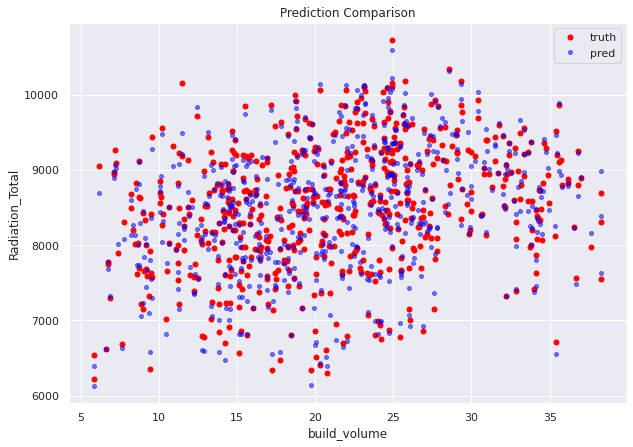

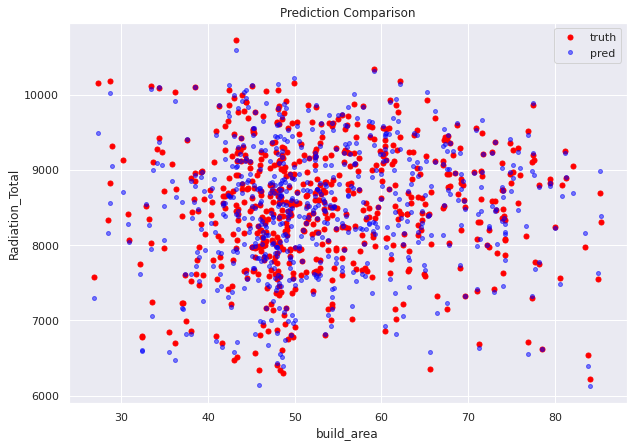

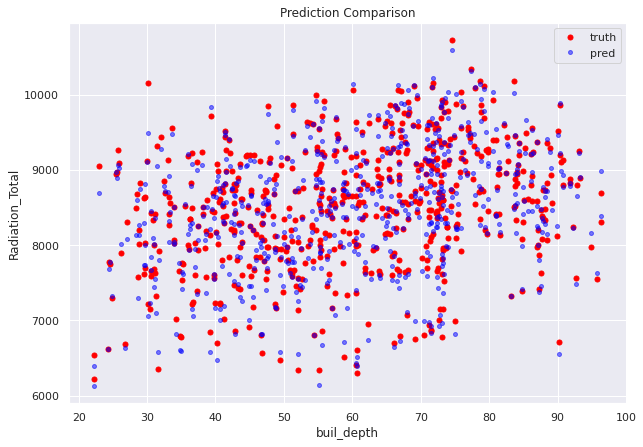

In [ ]:
#y_pred_2=[y_pred[0] for item in y_pred]
#print(y_pred_2)
#y_truth_2=[y_truth[0] for item in y_truth]
#plot_comparison(build_volume, y_pred, y_truth, "build_volume", "Radiation_Total")
#X = data[["Plot_Min_Witdh", "Build_Max_Depth", "Building_Volume", "Building_Area"]]

min_witdh = (scalerX.inverse_transform(X_test)[:,0])
max_depth = (scalerX.inverse_transform(X_test)[:,1])
build_volume = (scalerX.inverse_transform(X_test)[:,2])
build_area = (scalerX.inverse_transform(X_test)[:,3])

#PLOT RADIATION 
plot_comparison(build_volume, y_pred_01, y_truth_01, "build_volume", "Radiation_Total")
plot_comparison(build_area, y_pred_01, y_truth_01, "build_area", "Radiation_Total")
plot_comparison(max_depth, y_pred_01, y_truth_01, "buil_depth", "Radiation_Total")

#PLOT THE ENERGY BALANCE 
#plot_comparison(build_volume, y_pred_02, y_truth_02, "build_volume", "Energy balance")

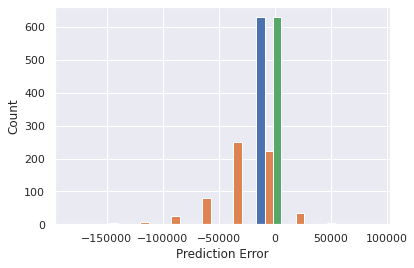

In [ ]:
error = y_pred - y_truth
plt.hist(error, bins=10)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

#**SAVE THE MODEL**

In [ ]:
model.save('COM_VISION-ML_REGRESSION_MODEL-V03.h5')

**EXPERIMENTING WITH PREDICTION**

In [ ]:
import numpy as np
# File path
filepath = '/content/COM_VISION-ML_REGRESSION_MODEL-V03.h5'


# Load the model
model = tf.keras.models.load_model(filepath, compile = True)

# Im giving it the values of the first row just to check what happens

#raw x values: 18.896986 	87.101372 	33.423961 	69.709425 	905684.79 	19016.096966 	2294.836551 	45.302281
#raw y values: 9020.00 	0.1443 	-3999265.33

#fit.transformed x values - [ 1.58656104  1.57439087  1.69183861  1.47684253  1.76488417  0.67673085   -0.67673085  1.98552519]
#fit.transformed y values[ 0.62423916 -0.07021049 -1.732858  ]



# : the txt file from gabriella would go here instead
samples_to_predict = [[18.896986, 87.101372, 33.423961, 69.709425, 905684.79, 19016.096966, 2294.836551, 45.302281]]
array_samples = np.array(samples_to_predict)

#uncomment this in case we want multiple block predictions at once
#length = len(samples_to_predict)
#reshaped = array_samples.reshape(length,8)

scaled_samples = scalerX.fit_transform(array_samples)

# Generate predictions for samples
predictions = model.predict(scaled_samples)


# Decode them back
#NOTE THAT e+03 means the comma moves 3 times to the right, while e-01 it moves 1 time to the left. Keep that in mind when interpreting the output!
final_predictions = scalerY.inverse_transform(predictions)
print(final_predictions)

#Save the txt for grasshopper to read
np.savetxt("prediction.txt", final_predictions)
print("text Saved")

ValueError: ignored